<a href="https://colab.research.google.com/github/adgcal/Anjan_collab_R/blob/main/2_DataFrames_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R curiosity (Variables and Data Frames) 
## Bioinformatics Essentials
### Anjan Kr Dasgupta (adgcal@gmail.com) 

In [ ]:
x<-pi 
cat("pi=",x,"\n")
y <- 10L# L means integer
cat("y=",y,"\n")
z=TRUE 
cat("z=",z,"\n")
name = "Krishna"
cat("name=",name)

pi= 3.141593 
y= 10 
z= TRUE 
name= Krishna

# Variable  Class

In [ ]:
class(x)
class(y)
class(z)
class(name)

[1] "numeric"

[1] "integer"

[1] "logical"

[1] "character"

# Factors 
## Plant growth is tested in three soil types 

In [ ]:
soil_type <- factor(c("Loam", "Sand", "Clay", "Loam", "Clay", "Sand", "Sand"))
plant_growth <- c(20, 15, 10, 18, 12, 14, 16)
model <- lm(plant_growth ~ soil_type)
summary(model)

### Levels of soil type

In [ ]:
levels(soil_type) 

[1] "Clay" "Loam" "Sand"

# The Same problem tackled by not invoking factor 

In [ ]:
soil_loam <- c(1, 0, 0, 1, 0, 0, 0)
soil_sand <- c(0, 1, 0, 0, 0, 1, 1)
soil_clay<- c(0,0,1,0,1,0,0)
model <- lm(plant_growth ~ soil_loam + soil_sand+soil_clay)
summary(model)


Call:
lm(formula = plant_growth ~ soil_loam + soil_sand + soil_clay)

Residuals:
         1          2          3          4          5          6          7 
 1.000e+00  1.443e-15 -1.000e+00 -1.000e+00  1.000e+00 -1.000e+00  1.000e+00 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.000      0.866  12.702 0.000221 ***
soil_loam      8.000      1.225   6.532 0.002838 ** 
soil_sand      4.000      1.118   3.578 0.023215 *  
soil_clay         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.225 on 4 degrees of freedom
Multiple R-squared:  0.9143,	Adjusted R-squared:  0.8714 
F-statistic: 21.33 on 2 and 4 DF,  p-value: 0.007347


# A simple dataframe 

In [ ]:
df <- data.frame(
  name = c("Amal", "Bimal", "Kamal","Indrajit"),
  age = c(25, 30, 35,20),
  is_optimistic = c(TRUE, FALSE, FALSE,TRUE)
)
# How to tabulate a dataframe
knitr::kable(df)



|name     | age|is_optimistic |
|:--------|---:|:-------------|
|Amal     |  25|TRUE          |
|Bimal    |  30|FALSE         |
|Kamal    |  35|FALSE         |
|Indrajit |  20|TRUE          |


|name     | age|is_optimistic |
|:--------|---:|:-------------|
|Amal     |  25|TRUE          |
|Bimal    |  30|FALSE         |
|Kamal    |  35|FALSE         |
|Indrajit |  20|TRUE          |

# Data Frame Example II 
## Insects 

In [ ]:
insects_df <- data.frame(
  species = c("Monarch butterfly", "Honey bee", "Ladybug", "Grasshopper"),
  family = c("Nymphalidae", "Apidae", "Coccinellidae", "Acrididae"),
  wingspan_cm = c(9, 2.5, 0.8, 6),
  lifespan_days = c(30, 60, 90, 365)
)
knitr::kable(insects_df)


|species           |family        | wingspan_cm| lifespan_days|
|:-----------------|:-------------|-----------:|-------------:|
|Monarch butterfly |Nymphalidae   |         9.0|            30|
|Honey bee         |Apidae        |         2.5|            60|
|Ladybug           |Coccinellidae |         0.8|            90|
|Grasshopper       |Acrididae     |         6.0|           365|

## Extracting data from the Insects data frame 

In [ ]:
knitr::kable(colnames(insects_df), col.names = c("Insect species and family"))


|Insect species and family |
|:-------------------------|
|species                   |
|family                    |
|wingspan_cm               |
|lifespan_days             |

## Plot of lifespan against wingspan


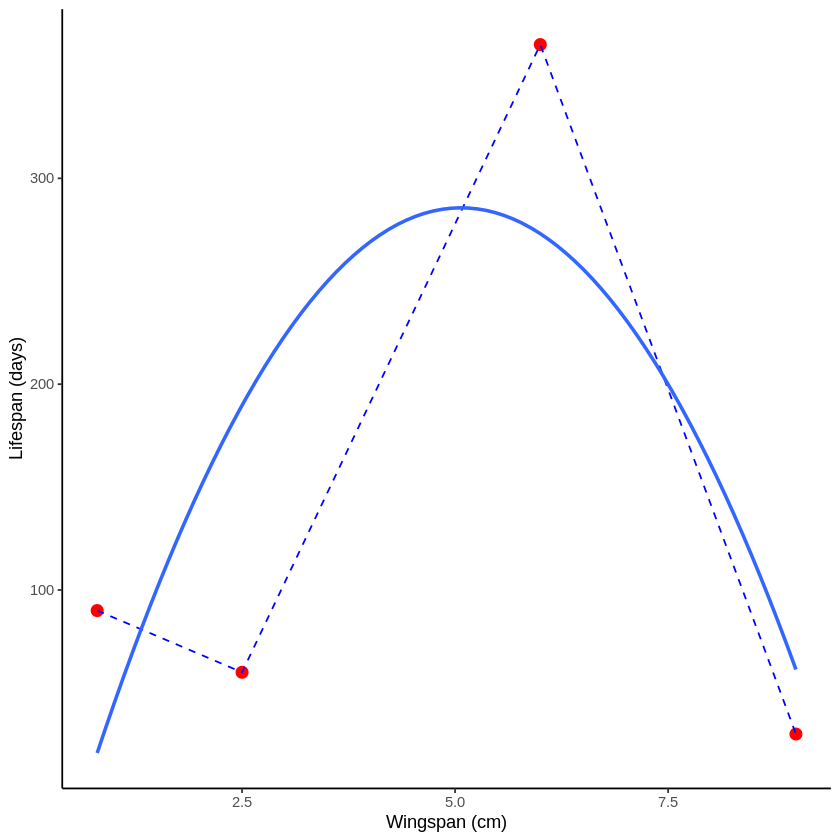

In [12]:
library(ggplot2)
# Create the scatterplot with polynomial fit
library(ggplot2)


# Create the scatterplot with polynomial fit and line connecting points
ggplot(insects_df, aes(x = wingspan_cm, y = lifespan_days)) +
  geom_point(size = 3, color = "red") +  # Actual points
  geom_line(color = "blue", linetype = "dashed") +  # Line connecting points
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, linetype = "solid") +  # Polynomial fit
  labs(x = "Wingspan (cm)", y = "Lifespan (days)") +
  theme_classic()  # Optional: Set a classic theme for the plot




### A simple data driven discovery 
There seems to be an optimal wingspan at which the life span has the maximal value 

# BMI 
## The standard units of weight and height used in BMI calculations are kilograms (kg) and meters (m), respectively.
### BMI formulea 
$ BMI= \frac{weight}{height^2}$

#### What is our question?
If we take weight and height of different individuals will BMI depend on weight?

In [13]:
library(dplyr)
# Create a simple data frame 
df_bmi=data.frame(weight = c(60, 72, 57, 90, 95, 72), 
 height =c(1.75, 1.80, 1.65, 1.90, 1.74, 1.91) )
 names(df_bmi) # Provides column names for this data frame 
# Create a modified data frame 
df_bmi <- df_bmi %>% mutate(BMI = weight/height^2)
 names(df_bmi) # Provides column names for this modified data frame 




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "weight" "height"

[1] "weight" "height" "BMI"

### Now let us explore whether BMI depends on weight or not 

In [14]:
model <- lm(BMI~weight, data = df_bmi) 
# lm is a Universal fitting package 
# lm fits in the form y~x 
# BMI  ~ weight means it fits BMI with weight 


### Summary of the model 
**"Multiple R-squared** value provides a measure of how well the model fits the data. This value is 0.7 in this case, which means that the model explains 70% of the variation in the data.
 Slope= signif(coef(model)[2],3),
Intercept = signif(coef(model)[1],3),
R-squared" = signif(summary(model)$r.squared,3)
signif(x,n) provides value of x for 3 significant digits 

In [ ]:
summary(model)


In [ ]:
result <- data.frame(
  "Slope" = signif(coef(model)[2],3),
  "Intercept" = signif(coef(model)[1],3),
  "R-squared" = signif(summary(model)$r.squared,3)
)
knitr::kable(result,caption='Summary of the BMI weight correlation')


Table: Summary of the BMI weight correlation

|       | Slope| Intercept| R.squared|
|:------|-----:|---------:|---------:|
|weight |  0.25|      4.54|     0.737|

# Finding out undesirable BMI
The desired value of BMI (Body Mass Index) varies depending on factors such as age, gender, and ethnicity. In general, a BMI in the range of *18.5 to 24.9* is considered healthy for most adults. However, this range is not applicable to children, adolescents, pregnant or breastfeeding women, and athletes or individuals with a high muscle mass, as different criteria apply to these groups.

In [22]:
BMI=df_bmi$BMI
x=(BMI-18.5)*(BMI-24.9)
Abnormal<- which(abs(x)>10) # Outside 18.5 to 24.9 BMI 
cat("BMI's are ",signif(BMI,3),"\n","ABNORMAL BMI=",signif(BMI[Abnormal],3))

BMI's are  19.6 22.2 20.9 24.9 31.4 19.7 
 ABNORMAL BMI= 31.4

# Chemistry exercise
##  Determine molecular weight from molecular formula 

In [117]:
install.packages("PeriodicTable")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Mass and vander waal radii of elements 

In [116]:
data(periodicTable)
mass(c("C","O","H")) # Atomic Masses 
rcov(c("C","O","H")) # Covalent radii
rvdw(c("C","O","H")) # van der Waals radii
atomColor(c("C","O","H"))


[1] 12.01070 15.99940  1.00794

[1] 0.76 0.66 0.31

[1] 1.70 1.52 1.10

[1] "#808080" "#FF0D0D" "#FFFFFF"

## Mwt of glucose 

In [100]:
#install.packages("stringr")
library(dplyr)
data(periodicTable)
library(stringr)

formula <- "C6H12O6"
s <- str_match_all(formula, "([A-Z][a-z]?)([0-9]*)")
#str_match_all(string, pattern)
print(s)
s <- as.data.frame(s)
s <- s[, -1]
elements <- s[, 1]
stoichiometry <- as.numeric(s[, 2])
w <- mass(elements)
mwt<- stoichiometry %*% w
mwt<- signif(mwt[1],4)
cat('Molecular Weight of', formula,'=',mwt)
?str_match_all

[[1]]
     [,1]  [,2] [,3]
[1,] "C6"  "C"  "6" 
[2,] "H12" "H"  "12"
[3,] "O6"  "O"  "6" 

Molecular Weight of C6H12O6 = 180.2

## Mwt of CaCl2 

In [114]:
library(dplyr)
data(periodicTable)
library(stringr)

formula <- "CaCl2"
s <- str_match_all(formula, "([A-Z][a-z]?)([0-9]*)")
s <- as.data.frame(s)
s <- s[, -1]
elements <- s[, 1]
stoichiometry <- as.numeric(s[, 2])
stoichiometry[is.na(stoichiometry)] <- 1
w <- mass(elements)
mwt<- stoichiometry %*% w
mwt<- signif(mwt[1],4)
cat('Molecular Weight of', formula,'=',mwt)

Molecular Weight of CaCl2 = 111

## Mwt of Lysine 

In [115]:
formula='C6H14N2O2' # Lysine 
s <- str_match_all(formula, "([A-Z][a-z]?)([0-9]*)")
s <- as.data.frame(s)
s <- s[, -1]
elements <- s[, 1]
stoichiometry <- as.numeric(s[, 2])
stoichiometry[is.na(stoichiometry)] <- 1
w <- mass(elements)
mwt<- stoichiometry %*% w
mwt<- signif(mwt[1],4)
cat('Molecular Weight of', formula,'=',mwt)

Molecular Weight of C6H14N2O2 = 146.2

# Determine hydrated radii of KCl

In [121]:
# Define known parameters
D <- 2.03e-9   # Diffusion coefficient of K+ and Cl- in water at 25°C (m^2/s)
T <- 298       # Temperature in Kelvin
kB <- 1.38e-23 # Boltzmann constant (J/K)
eta <- 8.9e-4  # Viscosity of water at 25°C (Pa*s)

# Calculate hydrated radii of K+ and Cl- ions in solution
r_K <- (kB * T)/(6 * pi * eta * D * 1e-10) # Convert D from m^2/s to Å^2/s
r_Cl <- (kB * T)/(6 * pi * eta * D * 1e-10)
r_hydrated<- r_K+r_Cl
# Print results
cat("Hydrated radius of K+ ion in water:", round(r_K, 2), "Å\n")
cat("Hydrated radius of Cl- ion in water:", round(r_Cl, 2), "Å\n")
cat("hydrated radius of KCl",r_hydrated)


Hydrated radius of K+ ion in water: 1.21 Å
Hydrated radius of Cl- ion in water: 1.21 Å
hydrated radius of KCl 2.415117

# Determine hydrated radii of NaCl

In [120]:
# Define known parameters
D <- 1.33e-9   # Diffusion coefficient of NaCl in water at 25°C (m^2/s)
T <- 298       # Temperature in Kelvin
kB <- 1.38e-23 # Boltzmann constant (J/K)
eta <- 8.9e-4  # Viscosity of water at 25°C (Pa*s)

# Calculate hydrated radii of Na+ and Cl- ions in solution
r_Na <- (kB * T)/(6 * pi * eta * D * 1e-10) # Convert D from m^2/s to Å^2/s
r_Cl <- (kB * T)/(6 * pi * eta * D * 1e-10)

# Calculate the sum of the hydrated radii
r_hydrated <- r_Na + r_Cl

# Print results
cat("Hydrated radius of Na+ ion in water:", round(r_Na, 2), "Å\n")
cat("Hydrated radius of Cl- ion in water:", round(r_Cl, 2), "Å\n")
cat("hydrated radius of NaCl",r_hydrated)


Hydrated radius of Na+ ion in water: 1.84 Å
Hydrated radius of Cl- ion in water: 1.84 Å
hydrated radius of NaCl 3.686231

# Hydrated radius 
- K+ ion in water: ~3.3 Å
- Hydrated radius of Na+ ion in water: ~3.5 Å